In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as pyplot
from keras.datasets import cifar10
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

170508288/170498071 [==============================] - 25s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


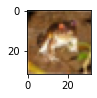

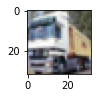

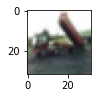

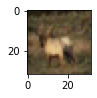

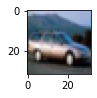

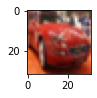

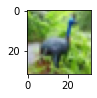

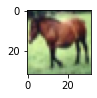

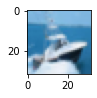

In [3]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
    
    pyplot.subplot(330 + 1 + i)

    pyplot.imshow(trainX[i])

    pyplot.show()

In [4]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [5]:
trainX=trainX.astype('float32')
testX=testX.astype('float32')
 
trainX=trainX/255.0
testX=testX/255.0

trainY=np_utils.to_categorical(trainY)
testY=np_utils.to_categorical(testY)
 
num_classes=testY.shape[1]

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

opt=SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

C:\Users\mrjmf\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
#model = load_model('model1_cifar_10epoch.h5')

In [ ]:
_, acc = model.evaluate(testX, testY, verbose=0)
print(acc*100)

In [ ]:
model.save("model1_cifar_10epoch.h5")